<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/imbalanced_classification/04_threshold_moving_recall_presicion_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import warnings

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# **Configuration**
---

In [183]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
warnings.simplefilter("ignore")
paleta = sns.color_palette("tab10").as_hex()

# **Funciones**
---

In [184]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)

def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

def matrix_confusion(
    y_true:pd.Series,
    y_pred:pd.Series,
    labels:list=None,
    title:str='confusion matrix', **kwards)->None:
  "confusion matrix"
  try:
    churm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.heatmap(churm, annot=True,  ax=ax, fmt='g', **kwards)
    ax.set_title(title,size=20)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ax.tick_params(labelsize = 12)
  except Exception as e:
    print(e)

# **Proceso**
---

In [185]:
n_features = 3

In [186]:
X, y = make_classification(
    n_samples=10000,
    n_features=n_features,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=12354
    )

In [187]:
data = pd.DataFrame(X, columns=[f'column_{i}' for i in range(n_features)])
data['Type'] = y

In [188]:
data.head()

,column_0,column_1,column_2,Type
0,-2.15,2.55,-0.25,0
1,-0.87,0.33,-1.57,0
2,-1.37,1.07,-1.73,0
3,-1.94,0.45,1.81,0
4,-0.77,0.21,1.07,0


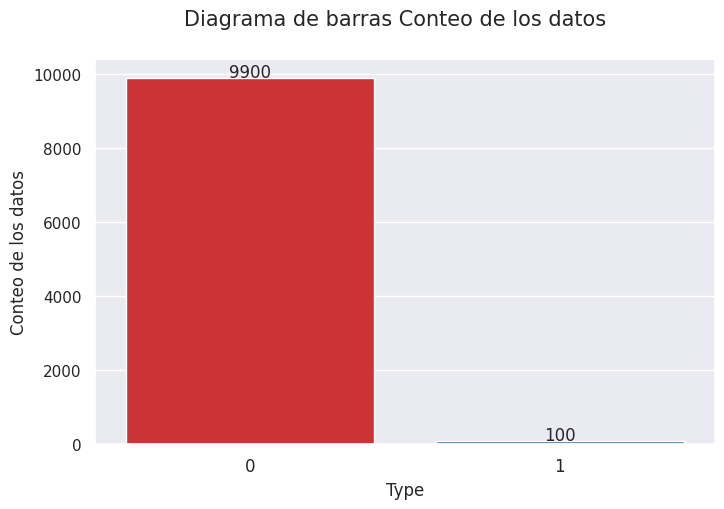

In [189]:
plot_bar(
    data,
    paleta=None,
    ejeX='Type',
    ejey='Conteo de los datos',
    title='Conteo de los datos')

# **Data Split**
---

- Por cada uno de los registros de la clase 1 hay aproximadamente 99 de la clase 0. Es un sesgo agresivo.

In [190]:
192/100, 9900/100

(1.92, 99.0)

In [191]:
X = data.select_dtypes(include=['float64', 'int64']).drop('Type', axis=1)
y = data.iloc[:,-1]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.2,
    random_state=12354,
    shuffle=True,
    stratify=y
)

# **Prepoda**
---

In [193]:
model = DecisionTreeClassifier(random_state=12354)

In [194]:
score_recall = metrics.make_scorer(
    metrics.recall_score,
    label=[1],
    average='binary'
)

In [195]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(2,5)),
    'min_samples_split': list(range(2, 10)),
}


grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    refit=True,
    return_train_score=True,
    scoring = score_recall,
    cv=10
)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=12354),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True,
             scoring=make_scorer(recall_score, label=[1], average=binary))

In [196]:
print('Mejor: %f usando %s' % (grid.best_score_, grid.best_params_))

Mejor: nan usando {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


In [197]:
model_final = grid.best_estimator_
model_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 12354,
 'splitter': 'best'}

In [198]:
y_prob = model_final.predict_proba(X_test)

In [199]:
y_prob_t = y_prob.copy()

In [200]:
y_prob_t = y_prob_t[:, 1]

In [201]:
y_prob_t

array([0., 0., 0., ..., 0., 0., 0.])

In [202]:
pd.Series(y_prob_t).value_counts()

0.00    7795
0.06     103
0.60     102
dtype: int64

In [203]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_t)

In [204]:
thresholds

array([0.        , 0.05714286, 0.6       ])

In [205]:
fscore = (2 * precision * recall)/ (precision+recall)
indice = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[indice], fscore[indice]))

Best Threshold=0.600000, F-Score=0.681


In [206]:
y_predict = model_final.predict(X_test)
metrics.f1_score(y_test, y_predict, average='binary')

0.6813186813186813

In [207]:
n_skill = len(y_test[y_test==1])/len(y_test)
n_skill

0.01

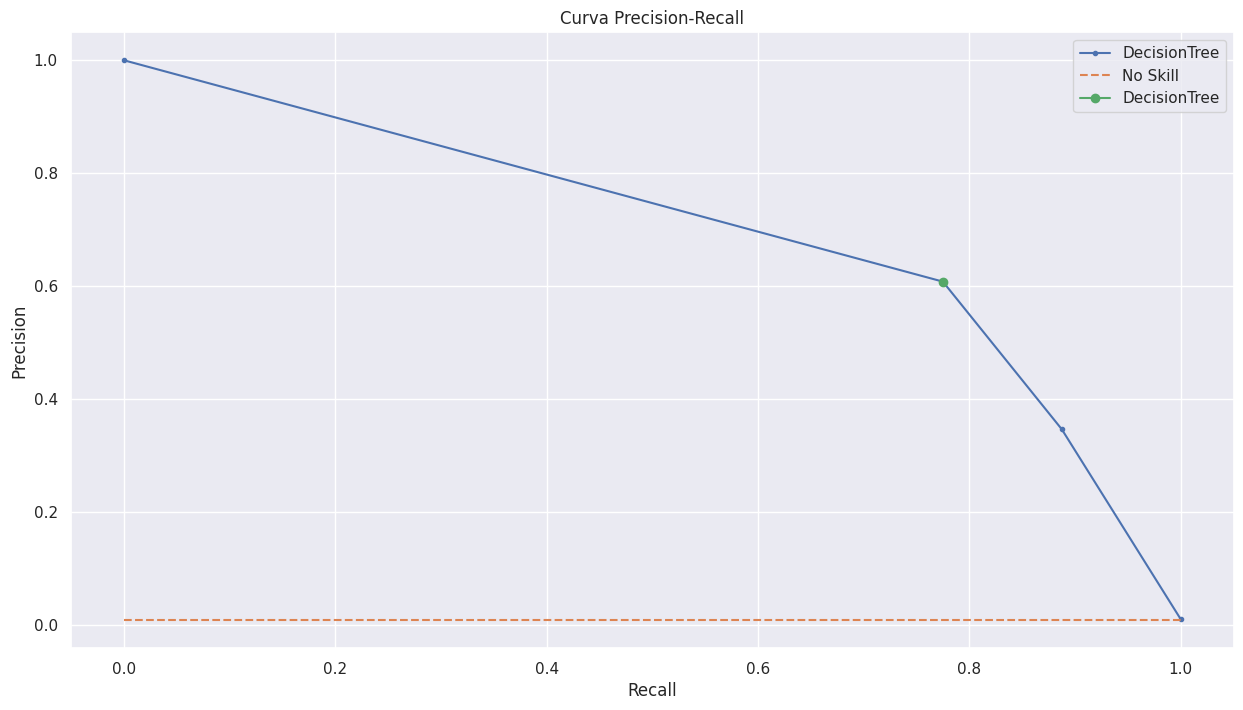

In [208]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(recall, precision, marker='.', label='DecisionTree')
no_skill = len(y_test[y_test==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall[indice], precision[indice], marker='o', label='DecisionTree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

Parece que los modelos tipo árbol por su naturaleza no permiten una implementación idónea del proceso del umbral del f1 acore, ya que el mejor umbral se encuentra por encima del 0.5. Se validara con otro modelo de clasificación para ver la efectividad del modelo.

In [209]:
model_logis = LogisticRegression()

model_logis.fit(X_train, y_train)

LogisticRegression()

In [210]:
y_prob = model_logis.predict_proba(X_test)
y_prob_t = y_prob.copy()
y_prob_t = y_prob_t[:, 1]

In [211]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_t)

In [212]:
fscore = (2 * precision * recall)/ (precision+recall)
indice = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[indice], fscore[indice]))

Best Threshold=0.133718, F-Score=0.564


In [213]:
y_predict = model_logis.predict(X_test)
metrics.f1_score(y_test, y_predict, average='binary', labels=[1])*100

6.0

In [214]:
n_skill = len(y_test[y_test==1])/len(y_test)
n_skill

0.01

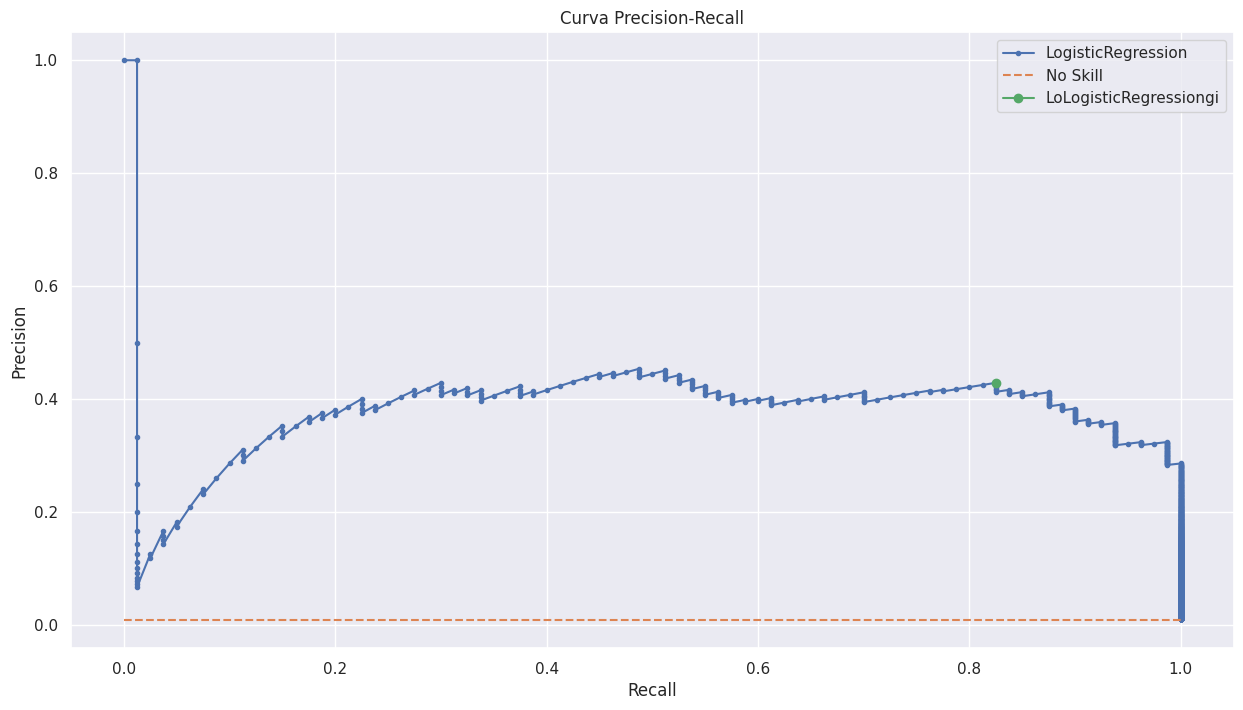

In [215]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(recall, precision, marker='.', label='LogisticRegression')
no_skill = len(y_test[y_test==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall[indice], precision[indice], marker='o', label='LoLogisticRegressiongi')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

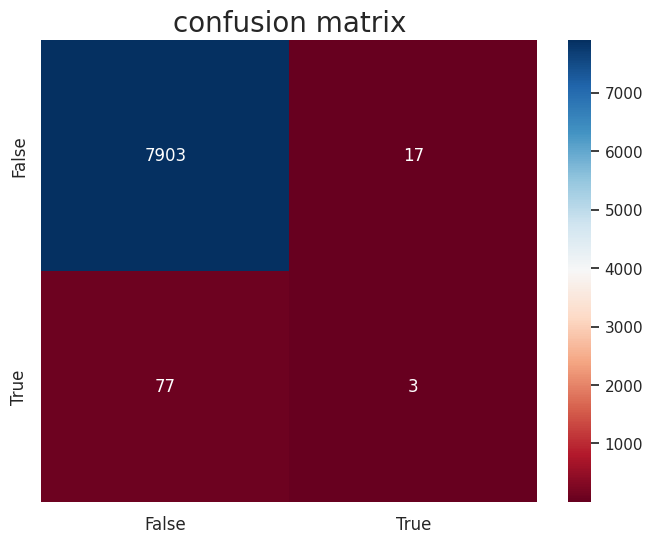

In [216]:
kward={"cmap":"RdBu",  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict, title='confusion matrix', **kward)

El modelo es muy deficiente, algo que se espera por el sesgo tan agresivo.

**Modificar umbrales**

In [217]:
transformaciones_predicciones = pd.DataFrame(y_prob, columns=[0, 1])

In [218]:
transformaciones_predicciones

,0,1
0,0.98,0.02
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,1.00,0.00
...,...,...
7995,1.00,0.00
7996,1.00,0.00
7997,1.00,0.00
7998,1.00,0.00


In [219]:
thresholds[indice]

0.13371816819633678

In [220]:
y_predict.dtype

dtype('int64')

In [225]:
exceeds_threshold = False
label = None
for i in range(0,y_prob_t.shape[0]):
  v = transformaciones_predicciones.iloc[i, -1]
  exceeds_threshold = (v > thresholds[indice])
  if exceeds_threshold:
    y_predict[i] = 1

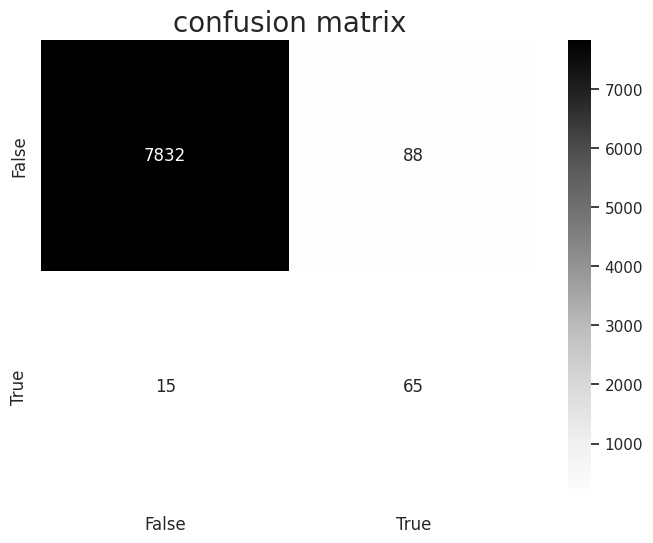

In [226]:
kward={"cmap":"Greys",  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict, title='confusion matrix', **kward)

In [227]:
metrics.f1_score(y_test, y_predict, average='binary', labels=[1])*100

55.793991416309005

El modelo tiene una mejoría, pero esta técnica tiende también a aumentar la posibilidad de aumentar los falsos positivos.